# Глава 12. Конфигурации, stylesheets

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
%matplotlib inline

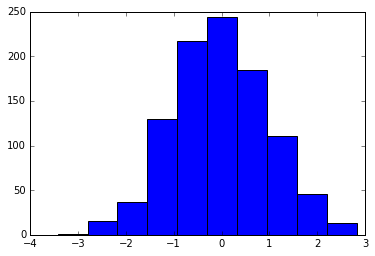

In [2]:
x = np.random.randn(1000)

# нарисуем обычную гистрограму
plt.hist(x);

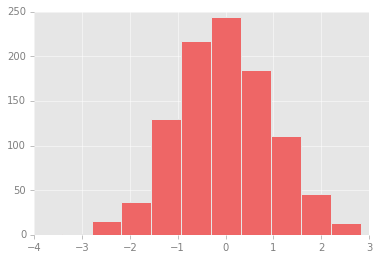

In [3]:
# теперь сделаем её более приятной глазу

# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
# в учебнике вместо facecolor используется axisbg, в матплоте 2.0+ её заменил facecolor
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

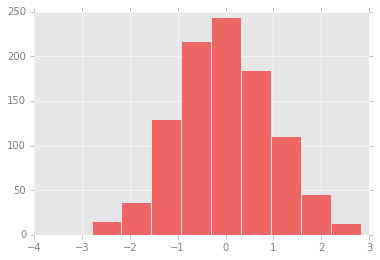

In [4]:
# гистограма стала красивой, однако писать столько кода для каждого графика лень
# поэтому изменим  defaults.

# при каждом запуске матплота он загружает конфиг (rc) со всеми стилями и т.д.

IPython_default = plt.rcParams.copy() # сохраним нынешние rcParams в "бекап"

# приступим к изменению конфига через plt.rc()

from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

# посмотрим что получилось создав гистрограму со "стандартными" настройками
plt.hist(x);

In [5]:
# в мпл 1.4 добавили модуль style. Вот список стилей которые в него входят
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

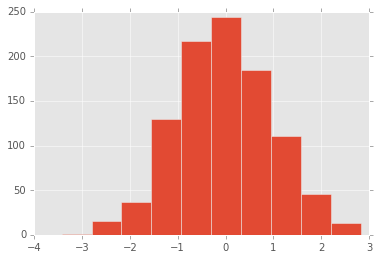

In [6]:
# для того чтобы выбрать один из этих стилей пишем:
plt.style.use('ggplot')
# и выведем гистограмму для демонстрации
plt.hist(x);

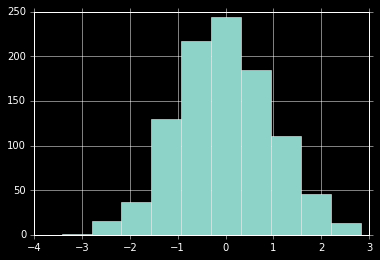

In [7]:
# plt.style.use('имя стиля') назначит стиль для ВСЕЙ сессии
# если хотим стиль для одного конкретного графика то:
# with plt.style.context('имя_стиля'):
#    и тут код для выведения графика

# мне лично зашел вот этот стиль, под темные темы самое оно ^_^
with plt.style.context('dark_background'):
    plt.hist(x)

# Глава 13 3D графики

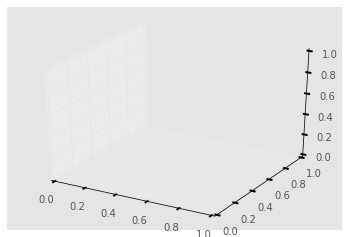

In [8]:
# матплот НЕ создан для 3Д, хоть и может в него через mplot3d

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
# передав plt.axes() projection='3d' получаем 3Д график
ax = plt.axes(projection='3d')

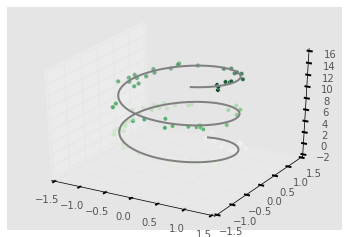

In [9]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

# ax.plot3D() и ax.scatter3D отображают данные на 3Д графике

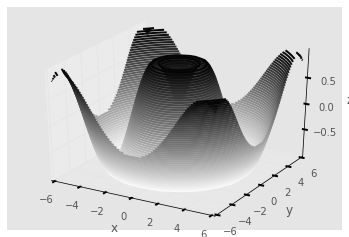

In [11]:
# 3Д контуры рисуются через ax.contour3D

# 3Д функция синусоиды
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

# ax.contour3D требует данные в формате двумерной сети со значениями Z
# для каждой точке этой сетки
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

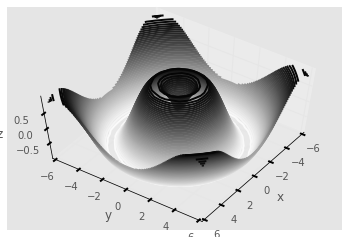

In [13]:
# изменение точки обзора графика
ax.view_init(60, 35) # подъем и азимут в градусах
fig

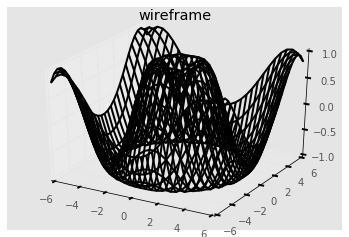

In [14]:
# еще есть wireframe
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

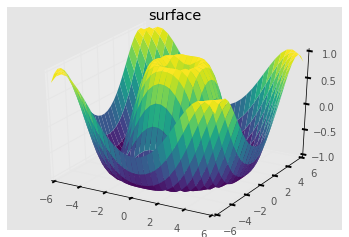

In [15]:
# и surface plot
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');